In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\nthie\Desktop\Getting_Knowing_Data\Movies\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


# Cleaning and Preprocess Data

In [3]:
#Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%.'.format(col, pct_missing))

name - 0.0%.
rating - 0.010041731872717789%.
genre - 0.0%.
year - 0.0%.
released - 0.0002608242044861763%.
score - 0.0003912363067292645%.
votes - 0.0003912363067292645%.
director - 0.0%.
writer - 0.0003912363067292645%.
star - 0.00013041210224308815%.
country - 0.0003912363067292645%.
budget - 0.2831246739697444%.
gross - 0.02464788732394366%.
company - 0.002217005738132499%.
runtime - 0.0005216484089723526%.


In [4]:
# Data types for columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# change data type of columns
df['budget'] = df['budget'].fillna(0)                #Convert nan/null to 0
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].fillna(0)                  #Convert nan/null to 0
df['gross'] = df['gross'].astype('int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [6]:
df['released_date'] = df['released'].str.replace(r"\(.*\)","", regex=True)
df['released_year'] = df['released_date'].str.slice(-5,-1)
df['released_country'] = df['released'].str.extract(r'\(([^()]+)\)')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_year,released_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",1980,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",1980,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",1980,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",1980,United States


In [7]:
df['released_date'] = df['released_date'].str.replace(',', '')
df['released_date'] = df['released_date'].str.slice(0,-6)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date,released_year,released_country
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June 13,1980,United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July 2,1980,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June 20,1980,United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July 2,1980,United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July 25,1980,United States


In [8]:
df=df.drop(columns=['released', 'year'])

In [9]:
move_released_time_col = df.pop('released_date')       #cut released_date column out of dataframe
df.insert(4, 'released_date', move_released_time_col)  #then insert it to an expected location

move_released_year_col = df.pop('released_year')       #cut released_year column out of dataframe
df.insert(5, 'released_year', move_released_year_col)  #then insert it to an expected location

move_released_country_col = df.pop('released_country')       #cut released_country column out of dataframe
df.insert(6, 'released_country', move_released_country_col)  #then insert it to an expected location


df.head()

,name,rating,genre,score,released_date,released_year,released_country,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,8.4,June 13,1980,United States,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,5.8,July 2,1980,United States,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,June 20,1980,United States,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,7.7,July 2,1980,United States,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,7.3,July 25,1980,United States,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [10]:
df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,score,released_date,released_year,released_country,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,8.4,June 13,1980,United States,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,5.8,July 2,1980,United States,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,June 20,1980,United States,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,7.7,July 2,1980,United States,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,7.3,July 25,1980,United States,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [13]:
pd.set_option('display.max_rows', None)

In [14]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)
df.head()

,name,rating,genre,score,released_date,released_year,released_country,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,8.4,June 13,1980,United States,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,5.8,July 2,1980,United States,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,June 20,1980,United States,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,7.7,July 2,1980,United States,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,7.3,July 25,1980,United States,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


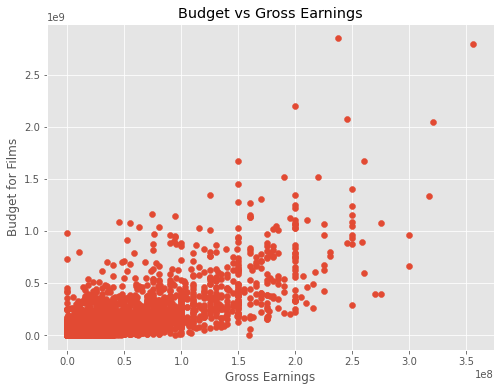

In [16]:
# Budget high correlation
# Company high correlation

# Scatter plot with budget vs gross

fig = plt.figure(figsize=(8, 6))

plt.scatter(x=df['budget'], y=df['gross'])
plt.title("Budget vs Gross Earnings")
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Films')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

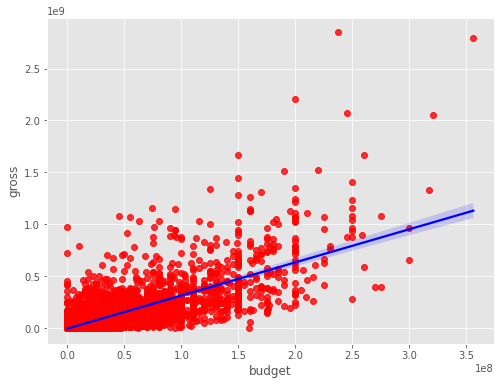

In [17]:
# Plot budget vs gross using seaborns

fig = plt.figure(figsize=(8, 6))

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [18]:
# Let's start looking at correlation

df.corr(method='pearson')    #pearson, kendal, spearman    df.corr(method='kendal')

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.399451,0.309212,0.269510,0.245235,1.000000


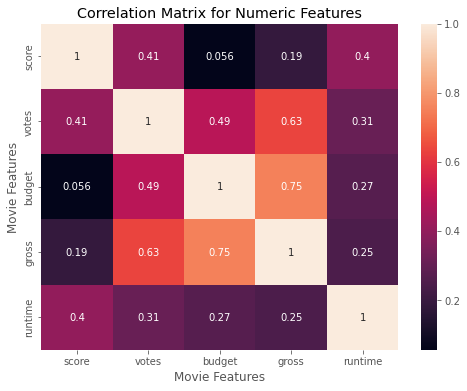

In [19]:
correlation_matrix = df.corr(method='pearson') 

fig = plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [20]:
# Looking at Company

df_numerized = df

for col_name in df_numerized:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,score,released_date,released_year,released_country,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,8.4,195,0,56,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0
1,5573,6,1,5.8,170,0,56,65000.0,2269,1632,327,55,4500000,58853106,731,104.0
2,5142,4,0,8.7,203,0,56,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0
3,286,4,4,7.7,170,0,56,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0
4,1027,6,4,7.3,176,0,56,108000.0,1054,521,410,55,6000000,39846344,1777,98.0


In [15]:
df.head()

,name,rating,genre,score,released_date,released_year,released_country,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,8.4,June 13,1980,United States,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,5.8,July 2,1980,United States,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,June 20,1980,United States,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,7.7,July 2,1980,United States,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,7.3,July 25,1980,United States,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


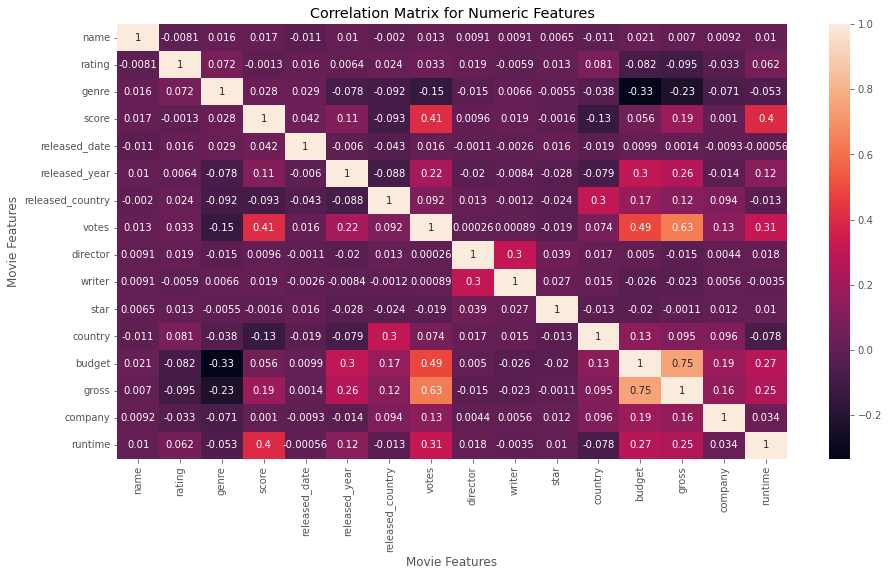

In [21]:
correlation_matrix = df_numerized.corr(method='pearson') 

fig = plt.figure(figsize=(15, 8))

sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [22]:
df_numerized.corr()

,name,rating,genre,score,released_date,released_year,released_country,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.017097,-0.011412,0.010225,-0.001968,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,-0.001314,0.015702,0.006403,0.023977,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,0.027965,0.028883,-0.078210,-0.091572,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711
score,0.017097,-0.001314,0.027965,1.000000,0.041731,0.106295,-0.092763,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451
released_date,-0.011412,0.015702,0.028883,0.041731,1.000000,-0.006004,-0.043480,0.016450,-0.001095,-0.002561,0.015808,-0.019358,0.009911,0.001411,-0.009290,-0.000563
released_year,0.010225,0.006403,-0.078210,0.106295,-0.006004,1.000000,-0.088402,0.218289,-0.020385,-0.008391,-0.027606,-0.079009,0.300236,0.255130,-0.014144,0.120636
released_country,-0.001968,0.023977,-0.091572,-0.092763,-0.043480,-0.088402,1.000000,0.092014,0.013331,-0.001201,-0.023540,0.297363,0.166895,0.119313,0.093962,-0.012612
votes,0.013088,0.033225,-0.145307,0.409182,0.016450,0.218289,0.092014,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212
director,0.009079,0.019483,-0.015258,0.009559,-0.001095,-0.020385,0.013331,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,0.019416,-0.002561,-0.008391,-0.001201,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511


In [24]:
correlation_matrix = df_numerized.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs.head()

name  name             1.000000
      rating          -0.008069
      genre            0.016355
      score            0.017097
      released_date   -0.011412
dtype: float64

In [26]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

genre   budget   -0.334021
budget  genre    -0.334021
genre   gross    -0.234297
gross   genre    -0.234297
votes   genre    -0.145307
dtype: float64

In [27]:
high_corr = sorted_pairs[(sorted_pairs) > 0.4] 

high_corr.head()                         #gross and vote have high correlation

votes   score     0.409182
score   votes     0.409182
budget  votes     0.486862
votes   budget    0.486862
gross   votes     0.632834
dtype: float64